# Market Basket Analysis

- Market Basket Analysis (MBA) kali ini menggunakan algoritma apriori
- Dataset yang digunakan merupakan dataset dari BurgerStar, sebuah perusahaan fiktif yang bergerak di bidang restoran cepat saji.

## Case Story
- Slamet merupakan salah satu tim data science di restoran BurgerStar yang sudah memiliki kurang lebih 300 cabang di Indonesia.
- Hari ini Slamet ditugaskan untuk menganalisis di salah satu cabang BurgerStar di Solo karena cabang tersebut baru dibuka selama satu minggu dan butuh promo - promo menarik agar pelanggan berdatangan.
- Slamet mendapatkan data hari 1 penjualan dan mencoba menganalisa data sehingga Slamet bisa memberikan rekomendasi yang tepat untuk BurgerStar cabang solo.

## Load Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
df = pd.read_csv('C:\\Users\\msi\\Documents\\Jupyter\\18. Unsupervised 2\\proyek\\dataset\\data_burgerstar.csv')

In [3]:
df.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


- Beberapa features yang ada di BurgerStar:
    1. Timestamp merupakan waktu dimana transaksi terjadi
    2. Type Burger merupakan jenis burger yang terjual
    3. Code Burger merupakan code dari burger yang terjual
    4. Amount Burger adalah jumlah burger yang terjual
    5. Type Drink adalah jenis minuman yang terjual
    6. Code Drink merupakan code dari minuman yang terjual
    7. Amount Drink adalah jumlah minuman yang terjual
    8. Gender merupakan jenis kelamin dari customer
    9. Payment merupakan metode pembayaran yang digunakan

- Features yang akan saya gunakan adalah type burger dan type drink sehingga features yang lain akan di drop

In [4]:
df.drop(columns=['Timestamp','Code Burger','Amount Burger','Code Drink','Amount Drink', 'Gender', 'Payment'], inplace=True)

In [5]:
df.head()

,Type Burger,Type Drink
0,Beef burger,Mineral water
1,Cheese burger,Coke
2,Double cheese burger,Mineral water
3,Chicken burger,Coffe
4,Cheese burger,Coke


## Sneak Peak to Data

In [6]:
df.shape

(312, 2)

In [7]:
df.describe()

,Type Burger,Type Drink
count,312,312
unique,4,4
top,Beef burger,Mineral water
freq,116,109


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 2 columns):
Type Burger    312 non-null object
Type Drink     312 non-null object
dtypes: object(2)
memory usage: 5.0+ KB


## Handling Missing Values

In [9]:
df.isnull().sum()

Type Burger    0
Type Drink     0
dtype: int64

- Data sudah clean dan bisa dilanjutkan ke dalam tahapan Exploratory Data Analysis

## Exploratory Data Analysis

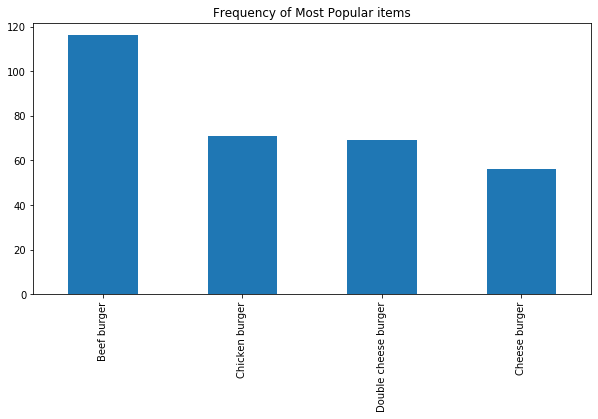

In [10]:
#Jumlah burger yang terjual menurut code
plt.figure(figsize=(10,5))
plt.title('Frequency of Most Popular items')
df['Type Burger'].value_counts().plot.bar()

- Dapat dilihat bahwa jenis burger yang paling laris adalah jenis Beef Burger

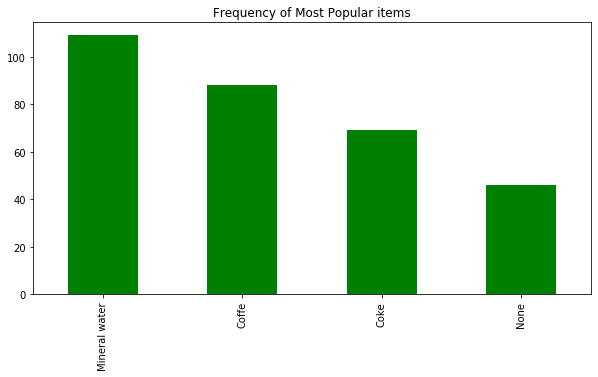

In [11]:
#Jumlah drink yang terjual menurut code
plt.figure(figsize=(10,5))
plt.title('Frequency of Most Popular items')
df['Type Drink'].value_counts().plot.bar(color='g')

- Dapat dilihat bahwa jenis minuman yang paling laris adalah jenis mineral water
- Ada juga pelanggan yang tidak membeli minum

## Modelling and Conclusion

- Karena apriori hanya menerima data dalam bentuk list, maka kita ubah dulu data kita menjadi list

In [12]:
df_list = []
for i in range(len(df)):
    df_list.append([str(df.values[i,j]) for j in range(0,2)])

- Setelah menjadi list, maka diubah ke dalam bentuk array

In [13]:
df_list = np.asarray(df_list)
df_list.shape

(312, 2)

- Agar data bisa dibaca, maka data diubah kedalam bentuk transaksi menggunakan TransactionEncoder

In [14]:
#Using Transaction Encoder
te = TransactionEncoder()
data = te.fit_transform(df_list)
data = pd.DataFrame(data, columns=te.columns_)
data.head()

,Beef burger,Cheese burger,Chicken burger,Coffe,Coke,Double cheese burger,Mineral water,None
0,True,False,False,False,False,False,True,False
1,False,True,False,False,True,False,False,False
2,False,False,False,False,False,True,True,False
3,False,False,True,True,False,False,False,False
4,False,True,False,False,True,False,False,False


In [15]:
data.shape

(312, 8)

- Menggunakan algoritma apriori

In [16]:
item = apriori(data, min_support=0.05, use_colnames=True)
item.sort_values(by='support', ascending=False)

,support,itemsets
0,0.371795,(Beef burger)
6,0.349359,(Mineral water)
3,0.282051,(Coffe)
2,0.227564,(Chicken burger)
4,0.221154,(Coke)
5,0.221154,(Double cheese burger)
9,0.205128,"(Beef burger, Mineral water)"
1,0.179487,(Cheese burger)
10,0.179487,"(Cheese burger, Coke)"
7,0.147436,(None)


- Dari hasil diatas dapat dilihat bahwa support atau item yang sering dibeli adalah Beef Burger untuk burger dan Mineral Water untuk Minuman (Single Item).
- Untuk Double Item dapat dilihat suppoer tertinggi adalah dari pasangan Mineral Water dan Beef Burger

- Melihat asosiasi dari data

In [17]:
assosiasi = association_rules(item, metric='lift')
assosiasi.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(Cheese burger),(Coke),0.179487,0.221154,0.179487,1.000000,4.521739,0.139793,inf
5,(Coke),(Cheese burger),0.221154,0.179487,0.179487,0.811594,4.521739,0.139793,4.355030
9,(None),(Chicken burger),0.147436,0.227564,0.112179,0.760870,3.343539,0.078628,3.230186
8,(Chicken burger),(None),0.227564,0.147436,0.112179,0.492958,3.343539,0.078628,1.681446
12,(Double cheese burger),(Mineral water),0.221154,0.349359,0.144231,0.652174,1.866773,0.066969,1.870593
13,(Mineral water),(Double cheese burger),0.349359,0.221154,0.144231,0.412844,1.866773,0.066969,1.326472
7,(Coffe),(Chicken burger),0.282051,0.227564,0.115385,0.409091,1.797695,0.051200,1.307199
6,(Chicken burger),(Coffe),0.227564,0.282051,0.115385,0.507042,1.797695,0.051200,1.456410
2,(Beef burger),(Mineral water),0.371795,0.349359,0.205128,0.551724,1.579247,0.075238,1.451430
3,(Mineral water),(Beef burger),0.349359,0.371795,0.205128,0.587156,1.579247,0.075238,1.521652


- Dari hasil diatas, data saya urutkan berdasarkan liftnya
- Untuk contoh interpretasi data yang pertama adalah pasangan dari Cheese burger dan Coke
    - Nilai confidencenya adalah 1 yang berarti bahwa setiap ada transaksi dari Cheese burger maka akan berisi Coke dengan persentasi 100%.
    - Nilai Lift adalah 4.52 yang berarti bahwa Coke 4.52 kali lipat akan dibeli oleh customer yang membeli Cheese Burger dibandingkan dengan <i>default likelihood sale of ‘Coke.’</i>

## Rekomendasi Slamet
- Slamet merekomendasikan cabang BurgerStar untuk memberikan paket paket menu:
    - Paket menu 1 adalah paket Cheese Burger dan Coke karena memberikan nilai lift yang sangat tinggi. Hal ini bertujuan agar mendongkrak penjualan dari cheese burger dan coke.
    - Paket menu 2 adalah paket Beef Burger dan Coke karena beef burger supportnya sangat tinggi untuk burger, dengan paket ini bertujuan agar penjualan coke bisa naik karena coke memiliki nilai support yang paling rendah untuk minuman.
    - Paket menu 3 adalah paket Cheese Burger dan Mineral Water karena Cheese burger mendapat nilai support paling rendah di tipe burger dan mineral water memiliki nilai support paling tinggi dalam tipe minuman. sehingga dengan paket ini diharapkan bisa meningkatkan penjualan Cheese Burger.
    - Paket menu 4 adalah paket combo Beef Burger dan Mineral Water yang kedua ini memiliki nilai support yang paling tinggi di setiap kategori.